# Seperating stock to forcast for certain dates depending on the product

In [1]:
%pip install nbformat pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from data_config import ProductHandler as ph

d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:13: DtypeWarning: Columns (4,6,20,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  products_s = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:15: DtypeWarning: Columns (5,29,42,48) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_i = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:18: DtypeWarning: Columns (43,57,106,141,146,211,212,247,255,294,298,316,327,332,350,354) have mixed types. Specify dtype option on import or set low_memory=False.
  tickets_c_m = pd.read_csv(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:21: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  sp_inv_adds = pd.read_csv(


----- DROP BOOLEAN AND NULL COLUMNS (NOT NEEDED) -----

Merged Data - Columns to be dropped (Missing Vals): ['BackStage_DefaultReportForm', 'BackStage_SmartMarkSet', 'BillCounty', 'CoreType', 'EndUserNum', 'EndUserPO', 'Equip3_ID', 'Equip3_Status', 'Est_v_Act_Notes', 'Ink_Status', 'JDF_Note_to_DFE', 'JDF_Send_Msg', 'MiscChargeDesc1', 'MiscChargeDesc2', 'MiscChargeDesc3', 'MiscChargeDesc4', 'PlateStat', 'ProofStat', 'Roto_CEL_Product_ID', 'Roto_Quote_Line_ID', 'Roto_Quote_Number', 'Schedule_Status', 'ShipAttn_EmailAddress', 'ShipCounty', 'ShipStat', 'Tag_x', 'Tool3Descr', 'Tool4Descr', 'Tool5Descr', 'ToolNo3', 'ToolNo4', 'ToolNo5', 'ToolStat', 'UserDef_MR_1_Lb', 'UserDef_MR_2_Lb', 'Assigned', 'Desc2_x', 'ediLineNumber', 'eTraxx_Customer_Notes', 'Location_x', 'PO_Number', 'Adhesive', 'Alternate', 'eTraxx_Forecast_Range', 'Material', 'Tag_y', 'UPC']

Merged Data - Columns to be dropped (All cols with rows same vals): ['Act_OTHER_Hours', 'ActArtwork', 'ActFinMaterial', 'ActPostPressHours',

d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:108: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['OrderDate'] = pd.to_datetime(
d:\SCM---ML-Visualisation\notebooks\neural_network\../../src\datasets.py:110: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['Ship_

In [5]:
ph.custom_prod_set()

All custom codes for existing products: 
{'892', '180', '298', '777', '949', '948', '881', '095', 'AFS', 'A26', '03R', '930', '711', '50V', '545', 'NF-', '-LB', 'RO-', '13V', 'OG-', '26V', '66X', '247', 'UG-', '352', 'SRF', '474', '444', 'E-0', 'BL-', '398', '224', '50Z', '349', 'PI-', 'OO-', 'REV', '199', '094', '28V', '433', 'ZU-', '035', '603', '862', '01W', '273', '327', '27T', '856', '093', 'RD-', '05Y', '765', '06V', 'AC-', '81Z', '593', '794', '194', '07V', '11Y', 'FLC', '4Y-', '19X', '99Z', '60S', '48X', 'AHF', '425', '38V', '74U', '282', '03W', 'AN-', 'PB-', 'GOO', '-06', '638', '399', 'PFG', 'HB-', '16W', '748', '137', '09Z', '90Y', '21X', 'BM-', '652', '478', '127', '515', '690', '255', 'HOL', '416', '092', '369', 'AVO', '808', 'ALB', 'IN-', '792', '946', '08Y', 'FO-', '46U', '243', 'AK-', 'UJP', '136', '5-1', 'V-T', 'TUL', '929', '225', '19W', '457', '-LA', '025', '99X', '74Y', '623', 'SA-', '60P', 'KWS', '30V', '747', '25X', '418', 'BR-', 'LAL', '063', '887', '18X', '44X',

In [6]:
# # display the highest order quantity customers 
# ph.highest_customs()

In [7]:
# define the features and target variable from 'product_sales'
# CHANGE THE CUSTOMER CODE HERE >>>>>>>>>>
custom_code_df = pd.DataFrame(ph.get_custom_code_data('FRE'))

# customer code for later referencing
custom_ref = custom_code_df.loc[0, 'ProductNumber'][:3].lower().upper()
print(custom_ref)

custom_code_df.head()

FRE


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


In [8]:
from scipy import stats

# Define a function to compute z-scores within each product group
def compute_zscore(group, threshold=3):
    # Only compute z-score if there are at least 2 data points in the group
    if len(group) >= 2:
        group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
    else:
        group['z_score'] = 0  # or np.nan if preferred
    return group

# Group by "ProductNumber" and compute z-scores for "OrderQuantity" within each group
df_grouped = custom_code_df.groupby('ProductNumber').apply(compute_zscore)

# Define your threshold for what constitutes an "unusually high" order
z_threshold = 3

# Filter for outliers (orders with a z_score greater than the threshold)
df_outliers = df_grouped[df_grouped['z_score'] > z_threshold]

# Display the results
print("Unusually high order quantities (per ProductNumber):")
print(df_outliers[['ProductNumber', 'OrderQuantity', 'z_score']])

print(f'Dropping: \n{df_outliers.count()}')
# Keep only rows where the z-score is within the acceptable range
df_cleaned = df_grouped[df_grouped['z_score'] <= z_threshold].drop(columns=['z_score'])

# Reset index for clarity
df_cleaned.reset_index(drop=True, inplace=True)

custom_code_df = df_cleaned


Unusually high order quantities (per ProductNumber):
                    ProductNumber  OrderQuantity   z_score
ProductNumber                                             
FRE-005-0015Y 48    FRE-005-0015Y         475000  4.034252
FRE-005-0016Z 104   FRE-005-0016Z         210000  3.438802
FRE-005-0019Z 169   FRE-005-0019Z         420000  3.244338
FRE-005-0024Y 238   FRE-005-0024Y         465000  3.440847
FRE-005-0045Z 418   FRE-005-0045Z        1440000  3.292242
FRE-005-0049Z 497   FRE-005-0049Z         720000  3.850058
FRE-005-0076Z 1067  FRE-005-0076Z         170000  3.678452
FRE-005-0081Z 1197  FRE-005-0081Z         375000  3.783414
FRE-005-0087Y 1397  FRE-005-0087Y         202500  3.417696
FRE-005-0090Z 1495  FRE-005-0090Z         315000  3.110541
FRE-005-0105X 1919  FRE-005-0105X         262500  3.215675
FRE-005-0111Y 2007  FRE-005-0111Y         457500  3.224130
FRE-005-0112W 2025  FRE-005-0112W         532500  3.190349
FRE-005-0115X 2054  FRE-005-0115X         150000  3.566041
FRE

C:\Users\44777\AppData\Local\Temp\ipykernel_14620\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14620\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14620\1363007664.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  group['z_score'] = np.abs(stats.zscore(group['OrderQuantity']))
C:\Users\44777\AppData\Local\Temp\ipykernel_14620\1363007664.py:7: RuntimeWarning: Preci

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
# df = custom_code_df

# features = ['ProductNumber', 'order_month',
#             'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
#             'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
#             'var_3m', 'var_6m', 'var_12m', 'var_18m',
#             'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
#             'yoy_growth', 'sales_2023', 'sales_2024'
#             ]
# target = 'OrderQuantity'

# X = df[features]
# y = df[target]

# # one-hot encoding for categorical features
# categorical_features = ['ProductNumber']
# encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# # preprocessor (keeps numerical features as is)
# preprocessor = ColumnTransformer(
#     transformers=[
#         # one-hot encode categorical features
#         ('cat', encoder, categorical_features)
#     ], remainder='passthrough'
# )

# # transform the features
# X_transformed = preprocessor.fit_transform(X)

In [11]:
customer_total = custom_code_df.copy()

# define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024'
           ]
target = 'OrderQuantity'


# filter the top products
total_X = customer_total[features]  # Features from top products
total_y = customer_total[target]    # Target variable

# define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = list(set(features) - set(categorical_features))  # All other features are numeric

# Define transformations
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

# ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),   # One-hot encode categorical features
        ('num', scaler, numeric_features)        # Standardize numeric features
    ]
)

# Train-test split
total_X_train, total_X_val, total_y_train, total_y_val = train_test_split(total_X, total_y, test_size=0.2, random_state=42)

# Transform the features
total_X_train_transformed = preprocessor.fit_transform(total_X_train)
total_X_val_transformed = preprocessor.transform(total_X_val)

# Output the shape
print(f"Train Shape: {total_X_train_transformed.shape}, Validation Shape: {total_X_val_transformed.shape}")
print("Feature processing for top products completed successfully!")

customer_total.head()

Train Shape: (3667, 434), Validation Shape: (917, 434)
Feature processing for top products completed successfully!


,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


In [12]:
from model_utils import *

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

# Define features and target
features = ['ProductNumber', 'order_month', 'order_week', 'order_weekday',
            'prev_month_sales', 'prev_week_sales', 'prev_2_month_sales', 'prev_3_month_sales',
            'moving_avg_3m', 'moving_avg_6m', 'moving_avg_12m', 'moving_avg_18m',
            'var_3m', 'var_6m', 'var_12m', 'var_18m',
            'log_var_3m', 'log_var_6m', 'log_var_12m', 'log_var_18m',
            'yoy_growth', 'sales_2023', 'sales_2024']
target = 'OrderQuantity'

# Prepare data
X = custom_code_df[features]
y = custom_code_df[target]

# # Define categorical and numeric features
categorical_features = ['ProductNumber']
numeric_features = [col for col in features if col not in categorical_features]

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('------------------------------')
print(y_val)
print('------------------------------')


# Preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ]
)

# Build the pipeline
mlp_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', MLPRegressor(
        hidden_layer_sizes=(256, 128, 64),
        activation='relu',
        solver='adam',
        alpha=0.0001,
        learning_rate_init=0.005,
        max_iter=2000,
        early_stopping=True,
        random_state=42))
])

# Train the model
mlp_pipeline.fit(X_train, y_train)

# Evaluate model using the imported function
train_metrics = evaluate_model(mlp_pipeline, X_train, y_train)
test_metrics = evaluate_model(mlp_pipeline, X_val, y_val)

# Print results
metrics = {'Neural Network': test_metrics}
metrics_df = pd.DataFrame(metrics).T
metrics_df = metrics_df[['MAE', 'MSE', 'RMSE', 'R²']]

print('\nFINAL METRICS SUMMARY:')
print(metrics_df)


------------------------------
1207     75000
3494    156000
1183     17500
100      57500
3880    410000
         ...  
1717     90000
3203     40000
1803     27500
3738    200000
227     100000
Name: OrderQuantity, Length: 917, dtype: int64
------------------------------
Mean Absolute Error (MAE): 12886.8276
Mean Squared Error (MSE): 516493041.2293
Root Mean Squared Error (RMSE): 22726.4833
R-squared (R²): 0.9704
Mean Absolute Error (MAE): 19456.1654
Mean Squared Error (MSE): 1162101342.4927
Root Mean Squared Error (RMSE): 34089.6075
R-squared (R²): 0.9461

FINAL METRICS SUMMARY:
                         MAE           MSE          RMSE        R²
Neural Network  19456.165356  1.162101e+09  34089.607544  0.946103


In [14]:
test_metrics

{'MAE': 19456.165355748293,
 'MSE': 1162101342.4926815,
 'RMSE': np.float64(34089.60754383484),
 'R²': 0.9461034319565771}

In [15]:
train_metrics

{'MAE': 12886.827566620184,
 'MSE': 516493041.2293195,
 'RMSE': np.float64(22726.483256969597),
 'R²': 0.9704144524000413}

In [16]:
mlp_pipeline.fit(total_X_train, total_y_train)

# Evaluate model using the imported function
total_train_metrics = evaluate_model(mlp_pipeline, total_X_train, total_y_train)
total_test_metrics = evaluate_model(mlp_pipeline, total_X_val, total_y_val)

Mean Absolute Error (MAE): 12886.8276
Mean Squared Error (MSE): 516493041.2293
Root Mean Squared Error (RMSE): 22726.4833
R-squared (R²): 0.9704
Mean Absolute Error (MAE): 19456.1654
Mean Squared Error (MSE): 1162101342.4927
Root Mean Squared Error (RMSE): 34089.6075
R-squared (R²): 0.9461


In [17]:
# Create a DetailedOrderDate column using week and weekday information.
# Adjust the format as needed based on your data.
custom_code_df['DetailedOrderDate'] = pd.to_datetime(
    custom_code_df['order_year'].astype(str) +
    custom_code_df['order_week'].astype(str).str.zfill(2) +
    custom_code_df['order_weekday'].astype(str),
    format='%Y%W%w'
)

In [18]:
# Get model predictions
y_train_pred = mlp_pipeline.predict(X_train)
y_val_pred = mlp_pipeline.predict(X_val)

# Use the 'total' for predictions for better idea on dashboards
total_y_train_pred = mlp_pipeline.predict(total_X_train)
total_y_val_pred = mlp_pipeline.predict(total_X_val)


In [19]:
# # statements to check the data of both y_val and y_val_pred
# print(y_val)
# print(y_val_pred)

In [20]:
y_val = pd.Series(y_val)

In [21]:
# Convert order year and month to datetime format
custom_code_df['OrderDate'] = pd.to_datetime(custom_code_df[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
custom_code_df = custom_code_df.sort_values(by='OrderDate')

In [22]:
print(y_val)

print(y_val_pred)

1207     75000
3494    156000
1183     17500
100      57500
3880    410000
         ...  
1717     90000
3203     40000
1803     27500
3738    200000
227     100000
Name: OrderQuantity, Length: 917, dtype: int64
[  94905.79225949  164539.20277142   23676.42792454   88798.20205543
  344890.8767904    55988.51659031  145081.6358583    93086.75851478
   79736.63002606   22612.68784912  123452.97554953   76661.24179224
   84291.6806655   254428.60913198   89624.03467553   63653.38711504
   66375.76283652  176280.02086464  106667.14815948   30514.73667783
   40039.58094833   70139.87458647  210362.81292692  144227.22181616
  238063.29992318   30825.20088196  140703.91653687  437877.12092582
  103987.41281374  208290.63427429   51167.95723195  483397.0656913
  225702.02222554   33724.32983937  108995.61521137   27871.65356456
   67151.35386852  130922.4695379    76036.43438909  134046.1487739
   46424.6692125    20730.77672295   44916.71272679   22340.95257987
   77537.6503888    65581.85033

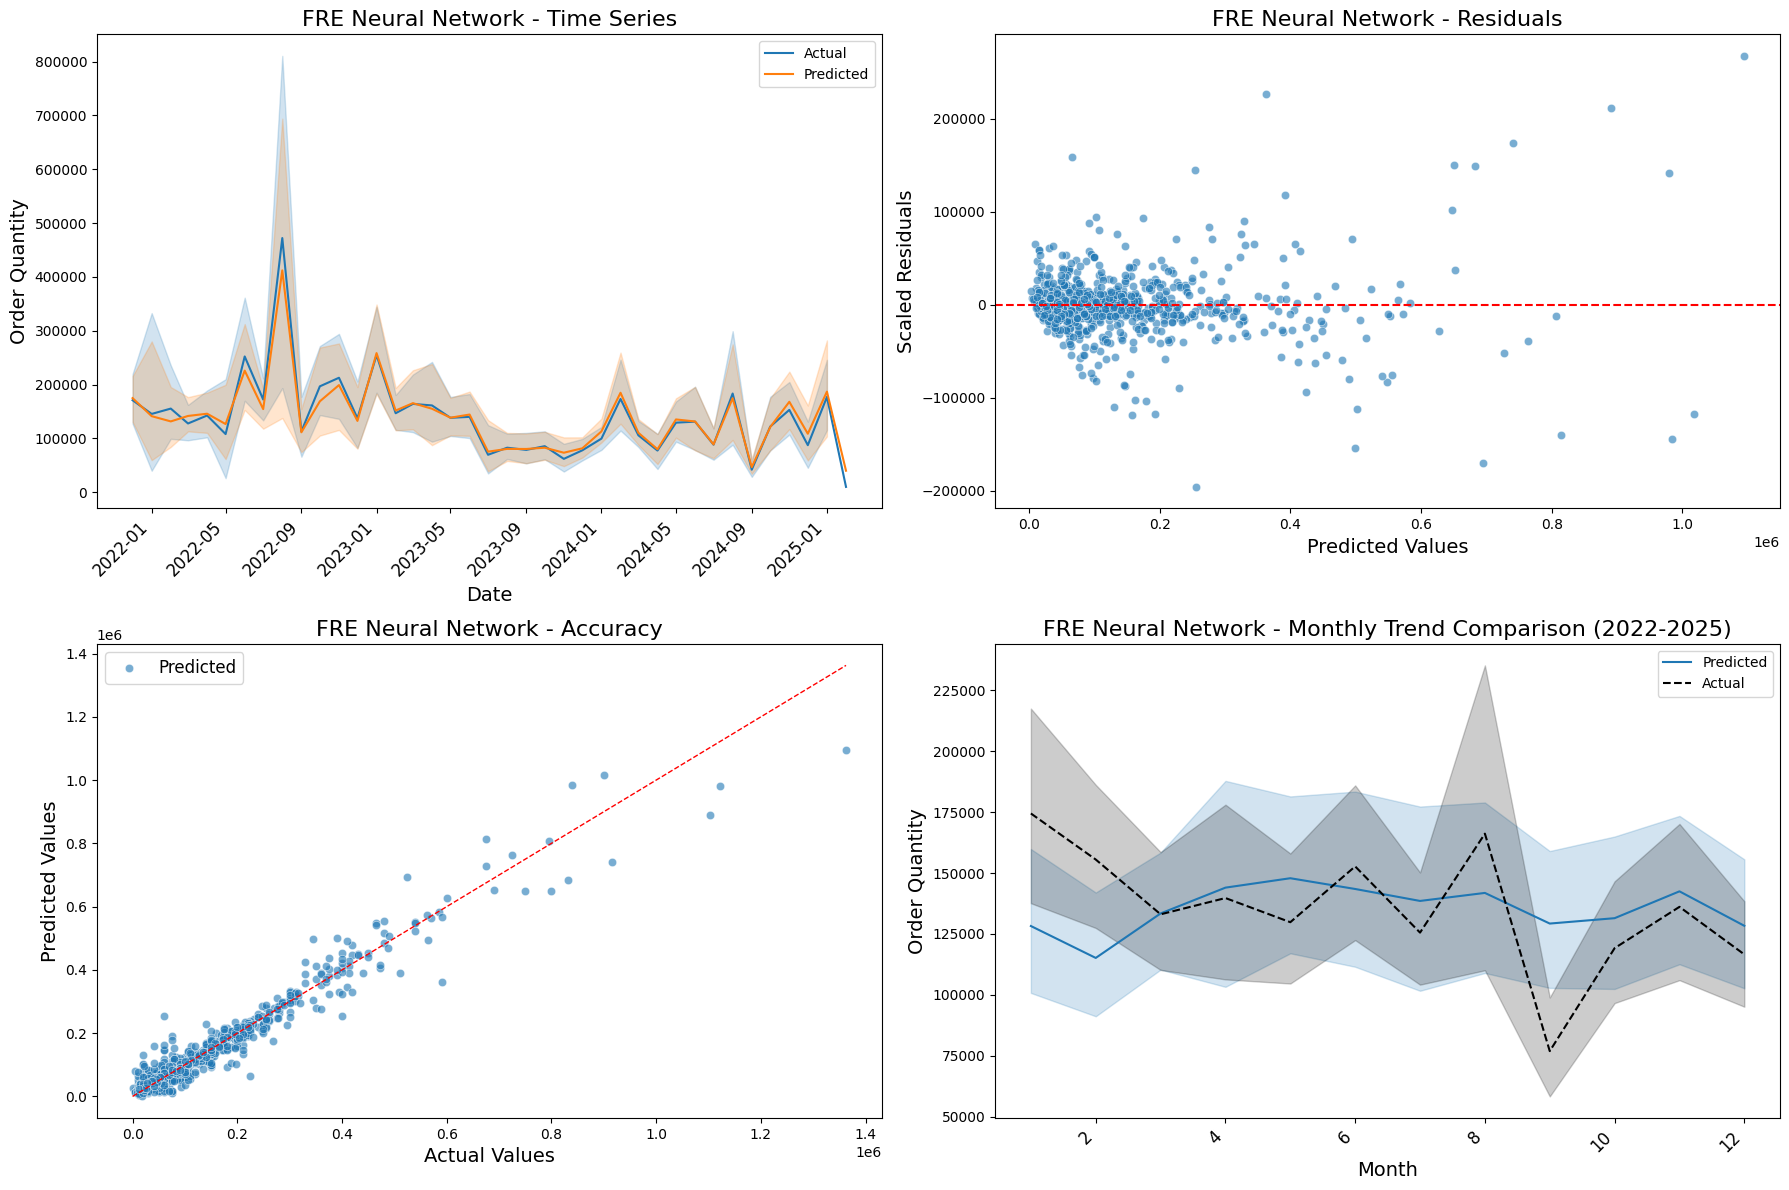

In [23]:
# Create subplots (2 rows, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12)) 
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Time Series Comparison
sns.lineplot(x=custom_code_df.loc[y_val.index, 'OrderDate'], y=y_val, label='Actual', ax=axes[0, 0])
sns.lineplot(x=custom_code_df.loc[y_val.index, 'OrderDate'], y=y_val_pred, label='Predicted', ax=axes[0, 0])
axes[0, 0].set_title(f'{custom_ref} Neural Network - Time Series', fontsize=16)
axes[0, 0].set_xlabel('Date', fontsize=14)  
axes[0, 0].set_ylabel('Order Quantity', fontsize=14)

# Residual Plot
residuals = y_val - y_val_pred
sns.scatterplot(x=y_val_pred, y=residuals, alpha=0.6, ax=axes[0, 1])
axes[0, 1].axhline(0, color='r', linestyle='--')
axes[0, 1].set_title(f'{custom_ref} Neural Network - Residuals', fontsize=16)  
axes[0, 1].set_xlabel('Predicted Values', fontsize=14)  
axes[0, 1].set_ylabel('Scaled Residuals', fontsize=14)

# Actual vs Predicted Scatter Plot
min_val = min(y_val.min(), y_val_pred.min())
max_val = max(y_val.max(), y_val_pred.max())
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6, ax=axes[1, 0], label='Predicted')
axes[1, 0].plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1)  # Reference line
axes[1, 0].set_title(f'{custom_ref} Neural Network - Accuracy', fontsize=16)
axes[1, 0].set_xlabel('Actual Values', fontsize=14)
axes[1, 0].set_ylabel('Predicted Values', fontsize=14)  
axes[1, 0].legend(fontsize=12)

# Monthly Trend Comparison
monthly_data = custom_code_df[['order_month']].loc[custom_code_df.index.intersection(X_val.index)].copy()
monthly_data['Actual'] = y_val
monthly_data['Predicted'] = y_val_pred

sns.lineplot(x='order_month', y='Predicted', data=monthly_data, label='Predicted', ax=axes[1, 1])
sns.lineplot(x='order_month', y='Actual', data=monthly_data, label='Actual', ax=axes[1, 1], color='black', linestyle='--')
axes[1, 1].set_title(f'{custom_ref} Neural Network - Monthly Trend Comparison (2022-2025)', fontsize=16)  
axes[1, 1].set_xlabel('Month', fontsize=14)
axes[1, 1].set_ylabel('Order Quantity', fontsize=14)

# Adjust x-tick labels after all plots are drawn
plt.setp(axes[0, 0].get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.setp(axes[1, 1].get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


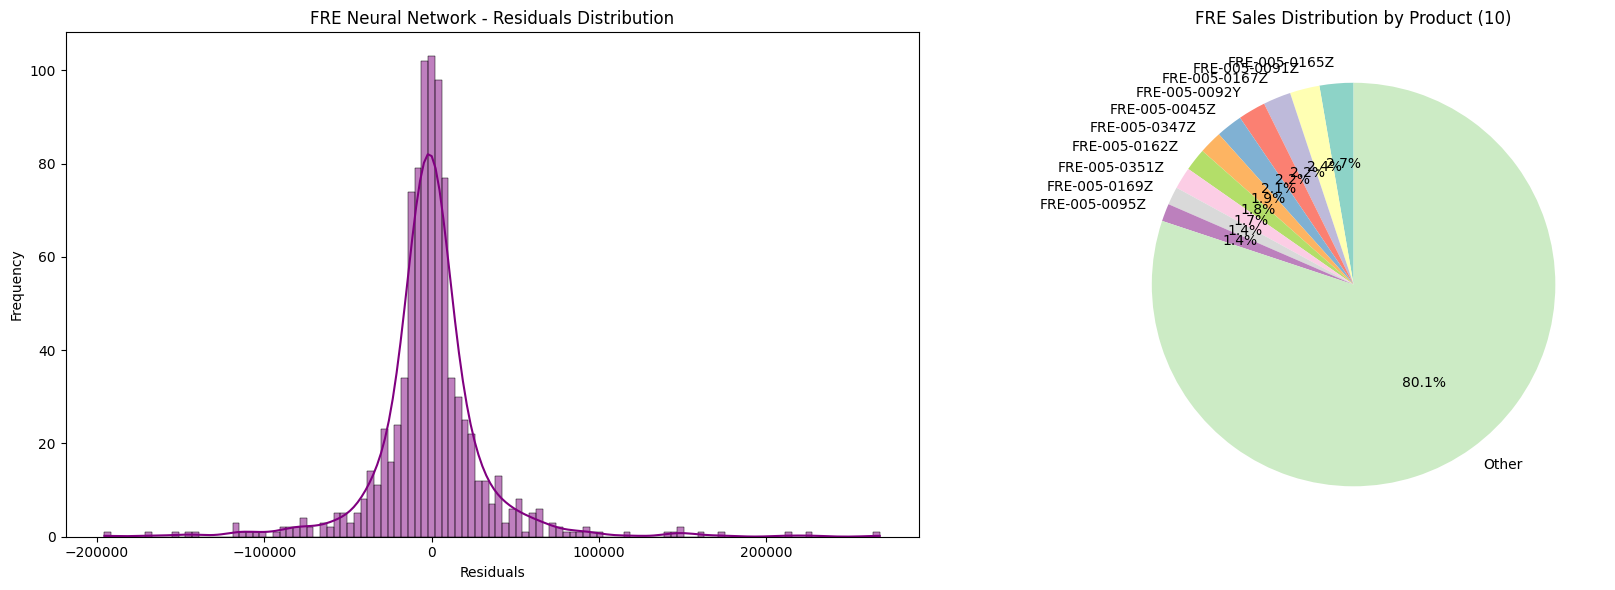

In [24]:
# Create subplots (1 row, 2 columns: one for line plot, one for residual plot)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Histogram of Residuals
sns.histplot(residuals, kde=True, color='purple', ax=axes[0])
axes[0].set_title(f'{custom_ref} Neural Network - Residuals Distribution', fontsize=12)
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')

# Pie Chart of Product Order Quantity (Top {number} + Other)
product_sales = custom_code_df.groupby('ProductNumber')['OrderQuantity'].sum()  # Group by product and sum order quantities

# Get the top 20 products by sales
top_products = product_sales.nlargest(10)

# Group the remaining products as 'Other'
other_sales = product_sales.drop(top_products.index).sum()
top_products['Other'] = other_sales

# Plot the pie chart
top_products.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3', len(top_products)))
axes[1].set_title(f'{custom_ref} Sales Distribution by Product ({len(top_products) - 1})', fontsize=12)
axes[1].set_ylabel('')  # Hide the y-label for the pie chart

plt.tight_layout()
plt.show()

In [25]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_3m,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv
0,FRE-005-0006Y,2022,1,3,1,0,66.0,40000,80000.00000,80000.00000,...,53333.333333,61000.000000,61000.000000,61000.000000,40000,0,0,-100.0,NaN,0
1,FRE-005-0006Y,2022,3,10,2,0,66.0,80000,40000.00000,40000.00000,...,50000.000000,66250.000000,66250.000000,66250.000000,80000,0,0,-100.0,NaN,0
2,FRE-005-0006Y,2022,4,14,3,0,66.0,40000,30000.00000,30000.00000,...,61666.666667,61666.666667,61666.666667,61666.666667,40000,0,0,-100.0,NaN,0
3,FRE-005-0006Y,2022,6,24,1,0,66.0,30000,115000.00000,115000.00000,...,72500.000000,72500.000000,72500.000000,72500.000000,30000,0,0,-100.0,NaN,0
4,FRE-005-0006Y,2022,7,30,1,0,66.0,115000,110031.53337,110031.53337,...,115000.000000,115000.000000,115000.000000,115000.000000,115000,0,0,-100.0,NaN,0


In [26]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

In [27]:
customer_total.head()

,ProductNumber,order_year,order_month,order_week,order_weekday,is_weekend,Customer_Num,OrderQuantity,prev_month_sales,prev_week_sales,...,moving_avg_6m,moving_avg_12m,moving_avg_18m,sales_2022,sales_2023,sales_2024,growth_2023,growth_2024,PhysicalInv,OrderDate
2134,FRE-005-0120Z,2020,11,48,2,0,66.0,20000,110031.53337,110031.53337,...,20000.000000,20000.000000,20000.000000,0,0,0,NaN,NaN,0,2020-11-01
1279,FRE-005-0084Z,2021,7,28,2,0,66.0,190000,250000.00000,250000.00000,...,146666.666667,192083.333333,186666.666667,0,0,0,NaN,NaN,5000,2021-07-01
1481,FRE-005-0090Z,2021,7,28,2,0,66.0,190000,20000.00000,20000.00000,...,179166.666667,152083.333333,120277.777778,0,0,0,NaN,NaN,0,2021-07-01
3892,FRE-005-0316Z,2021,10,42,4,0,66.0,250000,50000.00000,50000.00000,...,81250.000000,81250.000000,81250.000000,0,0,0,NaN,NaN,0,2021-10-01
962,FRE-005-0070Y,2021,12,52,0,0,66.0,120000,110000.00000,110000.00000,...,131666.666667,121000.000000,121000.000000,0,0,0,NaN,NaN,0,2021-12-01


In [28]:
# total_y_val.type

In [29]:
# total_y_val.type

In [30]:
# Convert order year and month to datetime format
customer_total['OrderDate'] = pd.to_datetime(customer_total[['order_year', 'order_month']].astype(str).agg('-'.join, axis=1))

# Sort by OrderDate to maintain time order
customer_total = customer_total.sort_values(by='OrderDate')

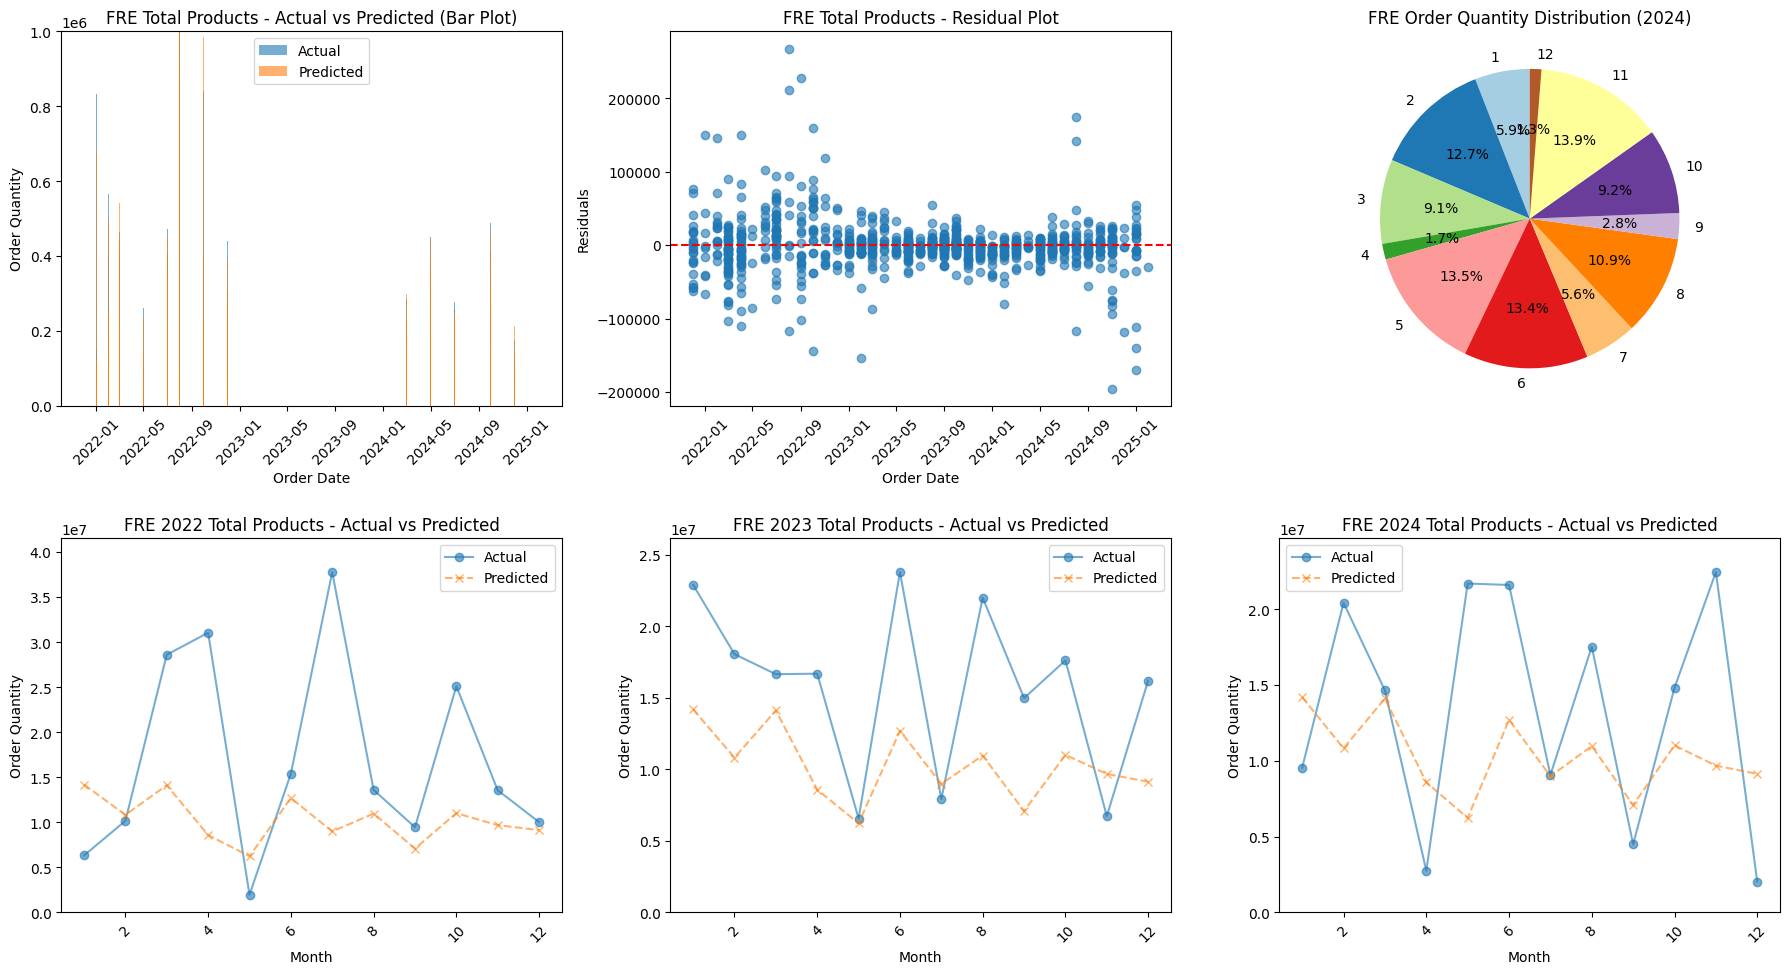

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Suppose X_val is a DataFrame, y_val is a NumPy array
# y_val_pred is also a NumPy array of predictions from your NN

# y_val_series = pd.Series(y_val, index=X_val.index)
# y_val_pred_series = pd.Series(total_y_val_pred, index=X_val.index)

# 2) Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# 3) Bar plot: Actual vs. Predicted
axes[0, 0].bar(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    total_y_val, 
    label='Actual', 
    alpha=0.6
)
axes[0, 0].bar(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    total_y_val_pred, 
    label='Predicted', 
    alpha=0.6
)
axes[0, 0].set_xlabel('Order Date')
axes[0, 0].set_ylabel('Order Quantity')
axes[0, 0].set_title(f'{custom_ref} Total Products - Actual vs Predicted (Bar Plot)')
axes[0, 0].set_ylim(0, 1_000_000)
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', rotation=45)

# 4) Residual Plot
residuals = total_y_val - total_y_val_pred
axes[0, 1].scatter(
    customer_total.loc[total_X_val.index, 'OrderDate'], 
    residuals, 
    alpha=0.6
)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Order Date')
axes[0, 1].set_ylabel('Residuals')
axes[0, 1].set_title(f'{custom_ref} Total Products - Residual Plot')
axes[0, 1].tick_params(axis='x', rotation=45)

# 5) Pie Chart: Order Quantity Distribution (2024)
order_2024 = customer_total[customer_total['order_year'] == 2024] \
    .groupby('order_month')['OrderQuantity'].sum()
axes[0, 2].pie(
    order_2024,
    labels=order_2024.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)
axes[0, 2].set_title(f'{custom_ref} Order Quantity Distribution (2024)')

# 6) Line Plots: Yearly Trends
for i, year in enumerate([2022, 2023, 2024]):  
    yearly_df = customer_total[customer_total['order_year'] == year]
    if yearly_df.empty:
        continue

    # Aggregate OrderQuantity per month
    monthly_actual = yearly_df.groupby('order_month')['OrderQuantity'].sum()

    # Convert to Pandas Series with index from customer_total
    pred_series = pd.Series(total_y_val_pred, index=total_y_val.index)

    # Group predictions by month
    monthly_predicted = pred_series.groupby(customer_total.loc[total_y_val.index, 'order_month']).sum()

    # Sort for proper plotting
    monthly_actual = monthly_actual.sort_index()
    monthly_predicted = monthly_predicted.reindex(monthly_actual.index)  # Ensure same months

    # Plot
    axes[1, i].plot(
        monthly_actual.index,
        monthly_actual,
        label='Actual',
        alpha=0.6,
        marker='o',
        linestyle='-'
    )
    axes[1, i].plot(
        monthly_predicted.index,
        monthly_predicted,
        label='Predicted',
        alpha=0.6,
        marker='x',
        linestyle='--'
    )
    axes[1, i].set_xlabel('Month')
    axes[1, i].set_ylabel('Order Quantity')
    axes[1, i].set_title(f'{custom_ref} {year} Total Products - Actual vs Predicted')
    axes[1, i].set_ylim(0, max(monthly_actual.max(), monthly_predicted.max()) * 1.1)
    axes[1, i].legend()
    axes[1, i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
